# Algoritmo de reconstrução esparsa - MPFI

*   PET - Física UFRN
*   Petiano : Matheus Felipe Freitas Tomaz
*   Data : 25 de Abril de 2023

O objetivo `Notebook` é apresentar o método MP ( *Matching Pursuit* ) para resconstrução de um sinal regular a partir de uma espaçamento irregular.

Esse Notebook está divido nas sequintes seções :

*   **Representações esparsas**
*   **Algoritmos esparsos**
*   **Construindo o algoritmo**

## Pré - requisitos

É interessante que o leitor já tenha tido contato com a transformada de fourier geralmente apresentada na disciplina de Física computacional II ou Física matemática III para um melhor entendimento da matemática desenvolvida neste `Notebook`.

## Importando bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 

## 1 . Apresentando o problema

****

### 1.1 . Introdução teórica

Representações esparsas têm grandes aplicações no campo de reconstruções de sinais. Tais representações diferem da representação tradicional pois oferecem um âmbito maior de geração de elementos (átomos).

O termo esparso refere-se a uma propriedade mensurável de um vetor, o qual não importa seu tamanho, mas suas entradas diferentes de zero. Vamos usar $l_0$ para representar essa propriedade.

### 1.2 . Formulação matemática

Segundo uma teoria conhecida *compressive sensing*, dado um sinal medido $y$, podemos dizer que o mesmo é dado por uma combinação linear de vetores, conhecidos como átomos. O conjunto desses átomos, chamamos de dicionário $A$, tal que $A = [d_1,d_1,...,d_n]$. Se o número de átomos de $A$ for maior  que a dimensão de $y$, então é possível fazer a decomposição de $y$ em termos dos átomos de $A$, logo

$$\tag{1.1} y = \sum_{i}^n x_id_i.$$

Reescrevendo na forma matricial, temos que

$$\tag{1.2} y = Ax.$$

Tomando $x$ como o vetor de representação esparsa de $y$ dado por $A$.

### 1.2 . O problema inverso

O problema inverso aparece quando conhecemos $y$ e queremos estimar $x$ a partir de $k$ medidas lineares dele. Matematimente, podemos formular

$$\tag{1.3} Ax = y + r, r \in R^m,$$

com uma matriz de dimensão $A = (d_{ij})_{mxn}$. Em particular, quando $m<n$ este sistemas tem infinitas soluções, e portanto só pode ser resolvido com alguma informação a priori adional de $x$. É conhecido que $x$ pode ser exatamente reconstruído com conhecimento a priori sobre a esparsidade de $x$ (ou seja, $||x||_0 = k$ com $k ≪ n$), onde $k$ é chamado de nível de esparsidade. Além disso, o sinal esparso pode ser muito bem estimado resolvendo o problema de minimização

$$ x = \text{argmin}||x||_0 $$ sujeito a reestrição $$ ||Ax - y||_2 <= e $$

onde $||x||_0$ é usado para garantir a esparsidade de $x$.

## 2 . Algoritmo esparso
****

### 2.1 . Definição

O algoritmo guloso é uma técnica de projeto de algoritmos que constrói uma solução pedaço a pedaço, escolhendo a cada iteração o elemento que oferece o maior benefício imediato. São conceitualmente muito simples, e são geralmente utilizados para resolver
problemas de otimização. Um algoritmo guloso inicia com um conjunto vazio de candidatos escolhidos. A cada iteração, tenta-se adicionar o melhor candidato entre os restantes, guiado por uma função de seleção. Se a viabilidade do conjunto de candidatos escolhidos for comprometida, o candidato é removido e nunca mais selecionado. Porém, se o conjunto permanecer viável, o novo candidato permanece no conjunto de candidatos escolhidos.

### 2.2 . *Matching Pursuit*

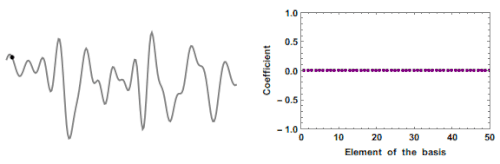

Mallat e Zhang (1993) [4] foram os primeiros a propor um algoritmo guloso, chamado de *Matching Pursuit* (MP), para aproximar os problemas de otimização restritos com norma $l_0$. O conceito central do MP é selecionar os melhores átomos do dicionário $A $ através de uma medida de similaridade para assim obter aproximadamente a solução esparsa de $y$. A codificação de $y$ em relação a $A$ pelo MP inicia-se com o resíduo de representação $r_0 = y$ (Informação a priori), com cada átomo de $A$ possuindo energia unitária. Então é selecionado o átomo com maior produto interno em módulo em relação a $y$, denotado por $d_{l_0}$:

$$\tag{2.1} |\langle r_0,d_{l_0} \rangle| = \text{max}|\langle r_0,d_{l_i} \rangle|,$$

onde $l_0$ é o índice do vetor coluna do diconário $A$. Então, temos que

$$ \tag{2.2} y = |\langle r_0,d_{l_0} \rangle|d_{l_0} + r_1.$$

O átomo encontrado a partir da Equação (2.1) minimiza $r_1$ na Equação (2.2). Para minimizar o resíduo de representação, o MP escolhe os melhores átomos a partir do dicionário sobrecompleto e utiliza o resíduo na iteração seguinte até atingir um erro de
aproximação satisfatório ou o número de átomos desejado.

Se a energia da N-ésima interação for suficientemente pequena, então temos

$$ \tag{2.3} y \approx \sum_{j}^{N-1} \langle r_j,d_{l_j} \rangle d_{l_j},$$

para $N << m.$

### 2.3 MPFI ( *Matching Pursuit Fourier Transform* )

Sabemos que a transformada de Fourier (espaçamento irregular [1]) é dada pela equação abaixo (2.4) abaixo. Levando essa equação para sua forma matricial (2.5), podemos perceber que obtemos uma relação semelhante a definida pela equação (1.2). Na qual, teremos que o dicionário $A$ é a própria matriz trasformada de Fourier $F$.

$$ \tag{2.4} f(k) = \sum_{n=0}^{N-1}f(x_n)e^{-2i\pi kx_n}.$$

Abrindo o sistema, temos que

$$
\begin{cases}
f(k_0) =f(x_0)e^{-2i\pi k_0x_0} + f(x_1)e^{-2i\pi k_0x_1} + ... + f(x_n)e^{-2i\pi k_0x_n}\\
f(k_1) =f(x_0)e^{-2i\pi k_1x_0} + f(x_1)e^{-2i\pi k_1x_1} + ... + f(x_n)e^{-2i\pi k_1x_n}\\
\vdots\\
f(k_j) =f(x_0)e^{-2i\pi k_jx_0} + f(x_1)e^{-2i\pi k_jx_1} + ... + f(x_n)e^{-2i\pi k_jx_n}.\\
\end{cases}
$$

Isso pode ser reescrito, na forma matricial

$$ \tag{2.5} X = Fx, $$

onde $F_{jn} = e^{-2i\pi k_jx_n}$, $x_n = [0,1]$ e $k=0,1,...N-1$.

Já é de nosso conhecimento que a transformada de Fourier de um dado sinal nos dá as frequências que formam aquele sinal. Quando, esparsamos esse sinal de maneira irregular, o espaço da transformada fica ruidoso, contudo as frequências principais ainda são visíveis, de modo que podemos usar o MP para capturar essas frequências, uma vez que eles possuem maior valor absoluto, e assim recuperar nosso sinal original.

## 3 . Construindo o algoritmo
****

Primeiramente, vamos construir o nosso sinal senoidal com 128 pontos amostrais.

In [2]:
def signal(N):
    
    pontos = np.linspace(0, N, N)
    sinal = np.zeros(N, float)
    
    for i in range(N):     
        sinal[i] = np.cos((np.pi*pontos[i])/16) + np.sin((np.pi*pontos[i])/8)
                             
    return sinal, pontos

In [3]:
N = 128
sinal, pontos = signal(N)

Plotando o resultado

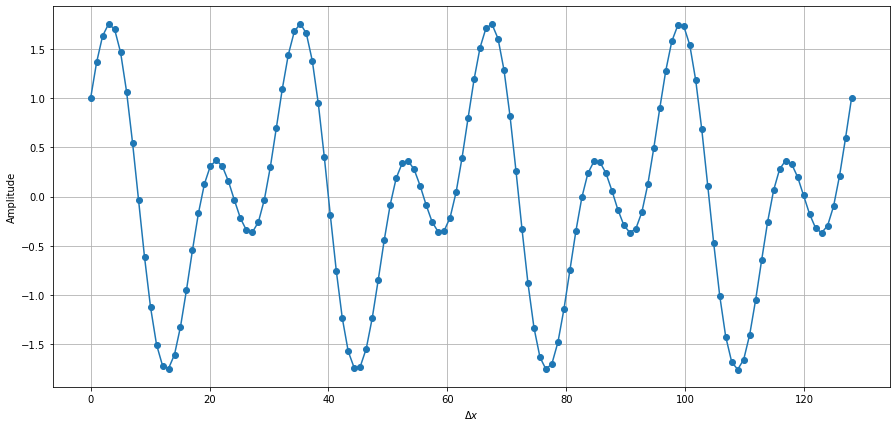

In [4]:
plt.figure(figsize=(15,7))
plt.plot(pontos, sinal, '-o')
plt.ylabel('Amplitude')
plt.xlabel('$\Delta x$')
plt.grid()
plt.show()

In [5]:
def Matriz_Transformada(Nk, pontos_normalizados):
    
    Np = len(pontos_normalizados)
    F = np.zeros((Nk,Np), complex)
    
    for k in range(Nk):
        for n in range(Np):
            F[k, n] = (1/Np)*np.exp(-2j*np.pi*k*pontos_normalizados[n])
    
    return F

def Matriz_Transformada_inversa(Nk, pontos_normalizados):
    
    Np = len(pontos_normalizados)
    iF = np.zeros((Np,Nk), complex)
    
    for k in range(Nk):
        for n in range(Np):
            iF[n, k] = np.exp(2j*np.pi*k*pontos_normalizados[n])
    
    return iF

Definindo os coeficientes de Fourier usando as funções criadas.

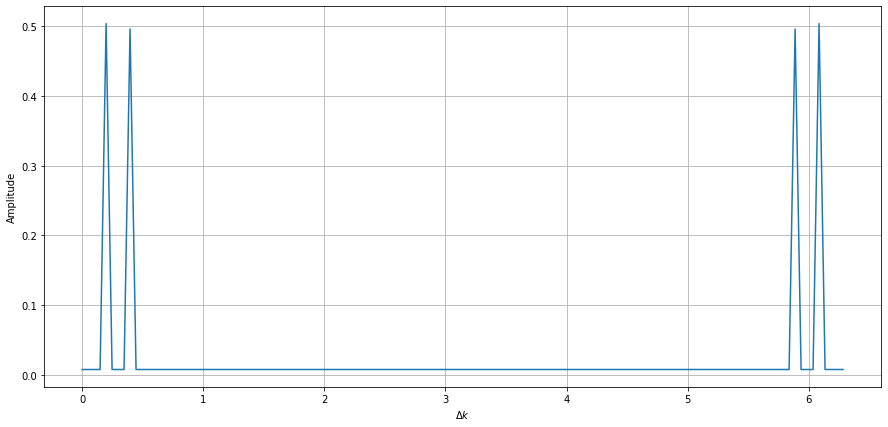

In [6]:
F = Matriz_Transformada(N, pontos/N)
fourier_domain = np.dot(F, sinal)

kn = np.linspace(0, 2*np.pi, N)

plt.figure(figsize=(15,7))
plt.plot(kn, abs(fourier_domain))
plt.ylabel('Amplitude')
plt.xlabel('$\Delta k$')
plt.grid()
plt.show()

Agora, vamos supor por um momento que só temos informação do sinal em alguns pontos e queremos interpolar (Criar informação).

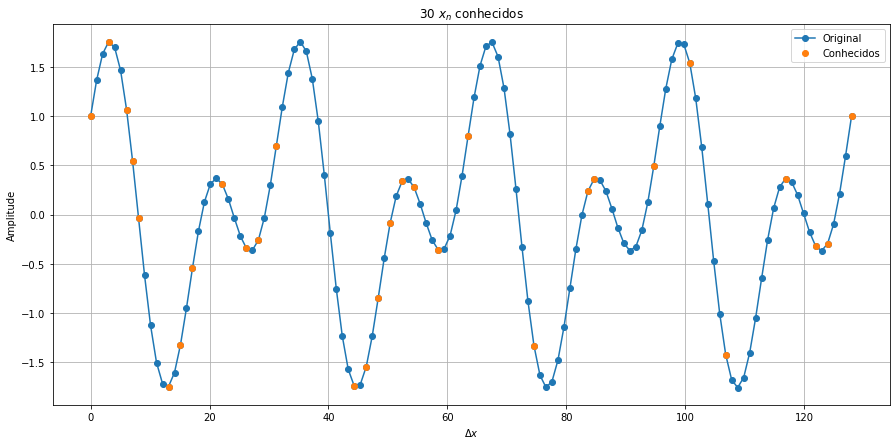

In [7]:
def signal_esparso(sinal, pontos):
    
    sinal_conhecido = []
    pontos_conhecidos = []
    idx = [0,3,6,7,8,13,15,17,22,26,28,31,44,46,48,50,52,54,58,63,74,83,84,94,100,106,116,121,123,127]
  
    for i in idx:
        sinal_conhecido.append(sinal[i])
    for j in idx:
        pontos_conhecidos.append(pontos[j])
        
    return np.array(sinal_conhecido), np.array(pontos_conhecidos)

sinal_conhecido, pontos_conhecidos = signal_esparso(sinal, pontos)

plt.figure(figsize=(15,7))
plt.plot(pontos, sinal, '-o', label='Original')
plt.plot(pontos_conhecidos, sinal_conhecido, 'o', label='Conhecidos')
plt.title(f'{len(pontos_conhecidos)} $x_n$ conhecidos')
plt.ylabel('Amplitude')
plt.xlabel('$\Delta x$')
plt.grid()
plt.legend()
plt.show()

Vamos ver como ficará nosso domínio de Fourier para o `sinal_conhecido`.

In [8]:
F = Matriz_Transformada(N, pontos_conhecidos/N)
fourier_domain = np.dot(F, sinal_conhecido)

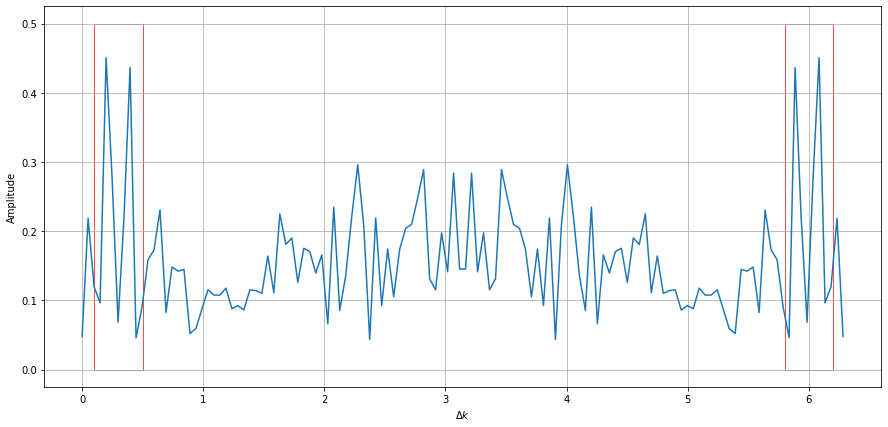

In [9]:
fig, ax = plt.subplots(1) 
fig.set_size_inches(15, 7)

ax.plot(kn, abs(fourier_domain))
rect, rect2 = patches.Rectangle((0.1, 0), 0.4, 0.5, linewidth=0.7, edgecolor='r', facecolor='none'), patches.Rectangle(
                                (5.8, 0), 0.4, 0.5, linewidth=0.7, edgecolor='r', facecolor='none')

ax.add_patch(rect)
ax.add_patch(rect2)

plt.ylabel('Amplitude')
plt.xlabel('$\Delta k$')
ax.grid()
plt.show()

Observe que nosso domínio da transformada ficou ruidoso. Contudo, podemos observar que as principais frequências.

Agora vamos usar o MP para tentar construir um novo domínio a e usa-ló para reconstruir nosso sinal.

In [10]:
def MPFI(dictionary, y , epsilon):

    r = y
    size_col_dictionary = dictionary.shape[1]
    indices = np.array([])
    x = np.zeros(( size_col_dictionary ,), complex)

    while ( np.linalg.norm (r , ord=2 ) >= epsilon ):
        
        absolute_fourier_domain = abs(np.dot(dictionary.T, r)) # Indo para o espaço da transformada

        max_freq_fourier_domain = max(absolute_fourier_domain) # Pegando a frequência com maior valor absoluto

        indices = np.where( absolute_fourier_domain == max_freq_fourier_domain )[0]

        atoms_selected = dictionary[:, indices ]

        coef_max_value = np.dot(atoms_selected.T, r) 

        x[ indices ] = x[ indices ] + coef_max_value # Guardando as frequências
        r = r - np.dot(coef_max_value, (len(y)*np.conjugate(atoms_selected.T))) # Atualizando o sinal
    
    return x

In [11]:
tol = 0.1
new_fourier_domain = MPFI(F.T, sinal_conhecido, tol)

Plotando o resultado.

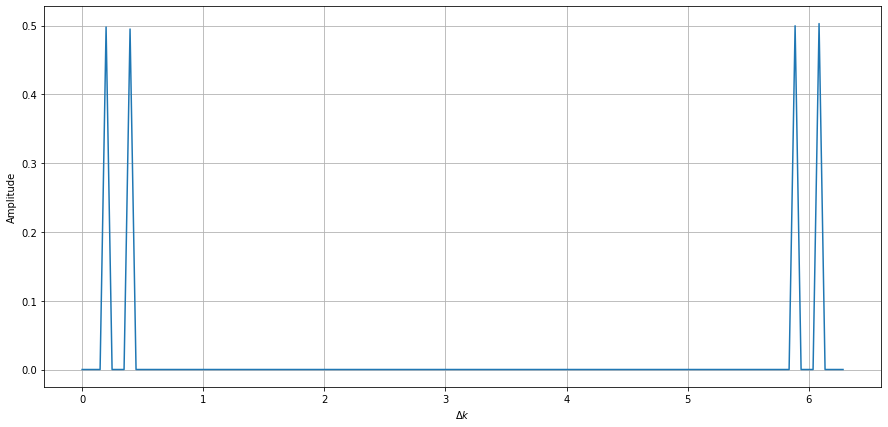

In [12]:
plt.figure(figsize=(15,7))
plt.plot(kn, abs(new_fourier_domain))
plt.ylabel('Amplitude')
plt.xlabel('$\Delta k$')
plt.grid()
plt.show()

Reconstruindo o sinal.

In [13]:
iF = Matriz_Transformada_inversa(N, pontos)
sinal_reconstruido = np.dot(iF, new_fourier_domain)

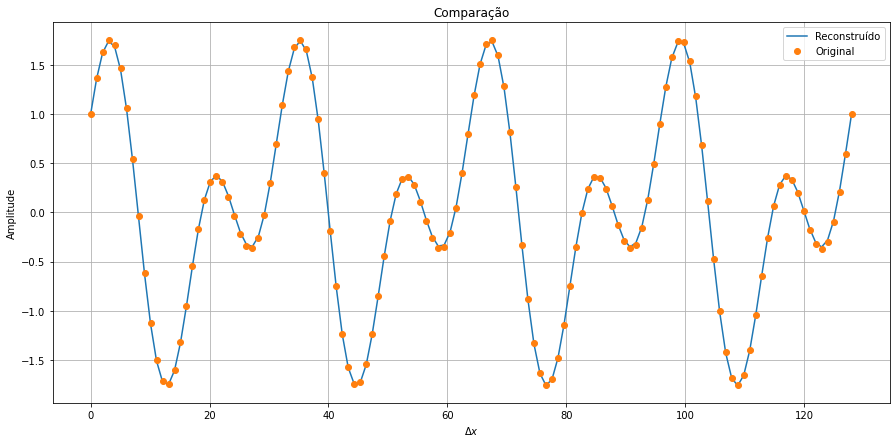

In [14]:
plt.figure(figsize=(15,7))
plt.plot(pontos, sinal_reconstruido.real, label = 'Reconstruído')
plt.plot(pontos, sinal ,'o', label='Original')
plt.title('Comparação')
plt.ylabel('Amplitude')
plt.xlabel('$\Delta x$')
plt.legend()
plt.grid()
plt.show()

Observe que usando o MP conseguimos recosntruir nosso sinal original. A eficácia desse algoritmo já foi constatada em vários artigos e o mesmo é usado nas mais diversas áreas do tratamento de sinais. Uma dessas areas é a geofísica ( Sismologia ), na qual esse método é usada para interpolação de dado sísmico. Em um próximo notebook, vamos explorar a aplicação desse código em um sismograma sintético.

## 4 . Referências
***

*  [1]  *Fourier reconstruction with sparce inversion (2005, Techische Univesiteit Delft), Paul Maarten ZWARTJES *. Disponível em: https://repository.tudelft.nl/islandora/object/uuid%3A9dfd4050-740f-4728-b1b9-a9364945b435.

*   [2] *Seismic regularization using Matching Pursuit and ALFT: A comparative study ( 2017 ), Yuri Shalom de Freitas Bezerra*.

*   [3] *Recuperação de sinal esparso com Matching Pursuit Ortogonal, João Eudes Lima ( 2022, UFRN )*. Disponível em: https://repositorio.ufrn.br/bitstream/123456789/49244/1/TCC_Eudes_atual___Esparsidade%20%281%29.pdf


*   [4] *Matching pursuits with time-frequency dictionaries, S.G. Mallat e Zhifeng Zhang ( 1993, Courant Institute of Mathematical Sciences )*. Disponível em:
https://ieeexplore.ieee.org/document/258082